<a href="https://colab.research.google.com/github/Anwesh1500/Mini-Project/blob/main/Brain_Tumor_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CLASSIFICATION OF DIFFERENT TYPES OF BRAIN TUMOR FROM CT SCAN**


In [1]:
#The Dataset for the following problem statement is obtain from Kaggle Dataset

#The zip file of the Dataset given should be uploaded to the current session 

#The Data of the CT-Scan is in the form of zip file so it should be unziped first

!unzip -uq /content/Brain_Tumor_Dataset.zip 

In [2]:
#importing the required libraries 

import numpy as np 
import os
import matplotlib
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import seaborn as sb
%matplotlib inline



data_array=[]
data_value=[]                               
#  1-BENIGN   2-MALIGNANT   3-NORMAL   are the differrent types of data that we are dealing with this Dataset
catagories=['BENIGN','MALIGNANT','NORMAL']



# Assign the path of the train folder in the dataset to dir_path 
dir_path=r"/content/Brain_Tumor_Dataset/Train"  
for types in os.listdir(dir_path):
    path1=os.path.join(dir_path,types)
    index=os.listdir(dir_path).index(types)+1
    for data in os.listdir(path1):
        path2=os.path.join(path1,data)
        data_array.append(np.array(resize(imread(path2),(120,120,3))).flatten())     #resizing the image 
        data_value.append(index)

In [3]:
# splitting the data into test and train sets 

x_train,x_test,y_train,y_test=train_test_split(data_array,data_value,test_size=0.15,shuffle=True,random_state=45)

x_train=np.array(x_train)
y_train=np.array(y_train)

In [4]:
# here we are using KNN classifier for the classification of image
#best parameter is selected using GridSearchcv


para={
    'n_neighbors':[5,7],
      'metric':['manhattan']
      }

clf=GridSearchCV(KNeighborsClassifier(),para,cv=5,n_jobs=-1)

clf.fit(x_train,y_train)

print('the best parameters are ')
print(clf.best_params_)          #the best parameter is predicted by the gridsearchcv




the best parameters are 
{'metric': 'manhattan', 'n_neighbors': 5}


In [5]:
print('the best score is ')
print(clf.best_score_)

print('the classifier score is ')
print(clf.score(x_test,y_test))


the best score is 
0.9368238794322782
the classifier score is 
0.9385474860335196


In [6]:
#predicting the model score

y_predicted=clf.predict(x_test)


the confusion matrix is 


Text(69.0, 0.5, 'True_Values')

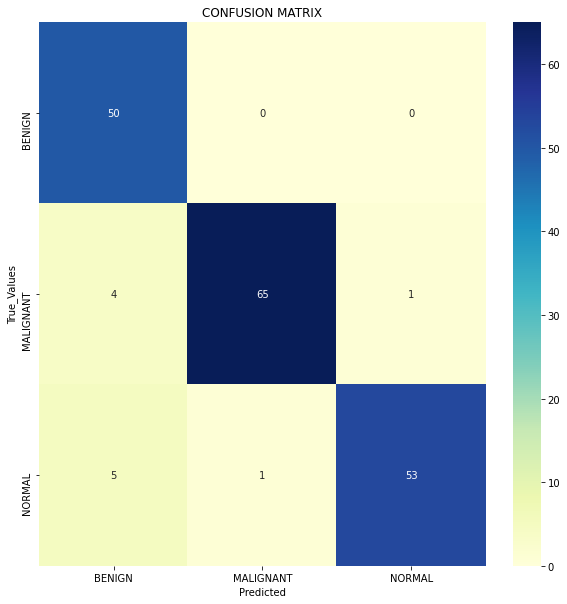

In [7]:
#Evaluating the model using confusion matrix and classification report accuracy score 

print("the confusion matrix is ")
cm = confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10,10))
sb.heatmap(cm, annot=True, cmap="YlGnBu",xticklabels=catagories, yticklabels=catagories)
plt.title("CONFUSION MATRIX")
plt.xlabel("Predicted")
plt.ylabel("True_Values")


In [8]:
print("the classification report is ")
print(classification_report(y_test,y_predicted,target_names=catagories))

print('the accuracy score is ')
print(accuracy_score(y_test,y_predicted))


the classification report is 
              precision    recall  f1-score   support

      BENIGN       0.85      1.00      0.92        50
   MALIGNANT       0.98      0.93      0.96        70
      NORMAL       0.98      0.90      0.94        59

    accuracy                           0.94       179
   macro avg       0.94      0.94      0.94       179
weighted avg       0.95      0.94      0.94       179

the accuracy score is 
0.9385474860335196


**Testing with new image**

In [9]:
# For validation/testing the validation dataset is given which is not used for training


x=[]

path_testimage1=r'/content/Brain_Tumor_Dataset/Validation/BENIGN/384.jpg'             
im_resized1=resize(imread(path_testimage1),(120,120,3))
im_array1=np.array(im_resized1)
im_flattened1 = im_array1.flatten()
im_flattened1=np.array(im_flattened1)
x.append(im_flattened1)

path_testimage2=r'/content/Brain_Tumor_Dataset/Validation/MALIGNANT/394.jpg'   
im_resized2=resize(imread(path_testimage2),(120,120,3))
im_array2=np.array(im_resized2)
im_flattened2 = im_array2.flatten()
im_flattened2=np.array(im_flattened2)
x.append(im_flattened2)

path_testimage3=r'/content/Brain_Tumor_Dataset/Validation/NORMAL/403.jpg'
im_resized3=resize(imread(path_testimage3),(120,120,3))
im_array3=np.array(im_resized3)
im_flattened3 = im_array3.flatten()
im_flattened3=np.array(im_flattened3)
x.append(im_flattened3)


y_predicted=clf.predict(x)


if y_predicted[0]==3:
  print("the scan doesnt have any tumor ")
elif y_predicted[0]==1:
  print("the image has chance of having "+catagories[0]+' tumor consult the Doctor')
elif y_predicted[0]==2:
  print("the image has chance of having "+catagories[1]+' tumor consult the Doctor')

if y_predicted[1]==3:
  print("the scan doesnt have any tumor ")
elif y_predicted[1]==1:
  print("the image has chance of having "+catagories[0]+' tumor consult the Doctor')
elif y_predicted[1]==2:
  print("the image has chance of having "+catagories[1]+' tumor consult the Doctor')

if y_predicted[2]==3:
  print("the scan doesnt have any tumor ")
elif y_predicted[2]==1:
  print("the image has chance of having "+catagories[0]+' tumor consult the Doctor')
elif y_predicted[2]==2:
  print("the image has chance of having "+catagories[1]+' tumor consult the Doctor')

the image has chance of having BENIGN tumor consult the Doctor
the image has chance of having MALIGNANT tumor consult the Doctor
the scan doesnt have any tumor 
